#Probability Theory Chapter 5: Special Distributions
##Applications: Applying Normal Distributions to SET Index

**Objectives**  
1) Simulate the normal distribution using matplotlib  
2) Visualize daily return and log return from SET Index  
3) Get sample moments from daily return and log return  
4) Understand what happened to SET index during this year

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

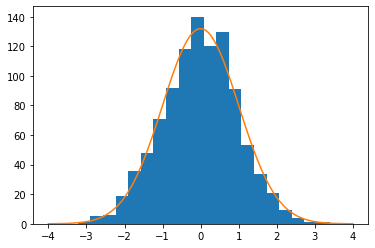

In [ ]:
N = 1000  # number of samples
x = np.random.randn(N) # use numpy random documentation to get sample from random distribution

num_bins = 20 # Define number of bins
plt.hist(x, bins=num_bins) # plot histogram using matplotlib

y = np.linspace(-4, 4, 100) # Return evenly spaced numbers over a specified interval
bin_width = (x.max() - x.min()) / num_bins

plt.plot(y, stats.norm.pdf(y) * N * bin_width) # Plot normal curve using p.d.f. calculated from scipy stats

plt.show()

We can see the simulation of normal distribution with the true distribution. It is pretty close as the number of samples is large (1000).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("assets/SET_2020.csv", index_col = ["Date"])
df.head()

,SET_INDEX
Date,
20-01-07,1585.23
20-01-08,1559.27
20-01-09,1579.64
20-01-10,1580.63
20-01-13,1586.16


In [ ]:
df['daily_return'] = df['SET_INDEX'].pct_change(1)
df.head()

,SET_INDEX,daily_return
Date,,
20-01-07,1585.23,NaN
20-01-08,1559.27,-0.016376
20-01-09,1579.64,0.013064
20-01-10,1580.63,0.000627
20-01-13,1586.16,0.003499


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


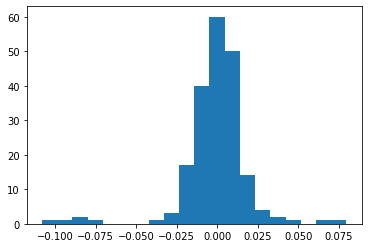

In [ ]:
num_bins = 20
plt.hist(df['daily_return'], bins=num_bins)

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


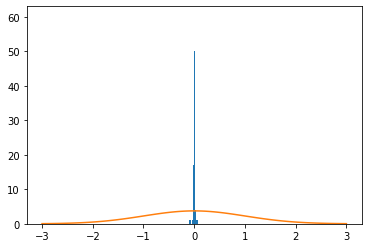

In [ ]:
num_bins = 20
plt.hist(df['daily_return'], bins=num_bins)

y = np.linspace(-3, 3, 100) # Return evenly spaced numbers over a specified interval
bin_width = (df['daily_return'].max() - df['daily_return'].min()) / num_bins

plt.plot(y, stats.norm.pdf(y) * N * bin_width) # Plot normal curve using p.d.f. calculated from scipy stats

plt.show()

This distribution is extremely far from normal, so we could not say that during this year SET return is expected to be normally distributed.   
After seeing these two plots, please pause the video and think about its mean, standard deviation, skewness and kurtosis.

In [ ]:
mean = df['daily_return'].mean()
std = df['daily_return'].std()

print("SET Daily Return has mean {:.2f} and std {:.2f}.".format(mean, std))

SET Daily Return has mean -0.00 and std 0.02.


In [ ]:
skew = df['daily_return'].skew()
kurtosis = df['daily_return'].kurtosis()

print("SET Daily Return has skewness {:.2f} and kurtosis {:.2f}.".format(skew, kurtosis))


SET Daily Return has skewness -1.61 and kurtosis 10.21.


In [ ]:
import numpy as np
df['log_return'] = np.log(1+df['daily_return'])
df.head()

,SET_INDEX,daily_return,log_return
Date,,,
20-01-07,1585.23,NaN,NaN
20-01-08,1559.27,-0.016376,-0.016512
20-01-09,1579.64,0.013064,0.012979
20-01-10,1580.63,0.000627,0.000627
20-01-13,1586.16,0.003499,0.003492


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


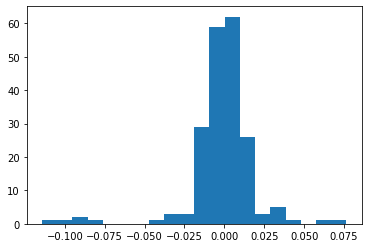

In [ ]:
num_bins = 20
plt.hist(df['log_return'], bins=num_bins)

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


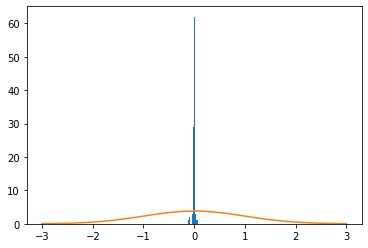

In [ ]:
num_bins = 20
plt.hist(df['log_return'], bins=num_bins)

y = np.linspace(-3, 3, 100) # Return evenly spaced numbers over a specified interval
bin_width = (df['log_return'].max() - df['log_return'].min()) / num_bins

plt.plot(y, stats.norm.pdf(y) * N * bin_width) # Plot normal curve using p.d.f. calculated from scipy stats

plt.show()

In [ ]:
mean = df['log_return'].mean()
std = df['log_return'].std()
skew = df['log_return'].skew()
kurtosis = df['log_return'].kurtosis()


print("SET Daily Return has mean {:.2f} and std {:.2f}.".format(mean, std))
print("SET Daily Return has skewness {:.2f} and kurtosis {:.2f}.".format(skew, kurtosis))

SET Daily Return has mean -0.00 and std 0.02.
SET Daily Return has skewness -1.90 and kurtosis 11.06.


In [ ]:
positive_return = df[df["log_return"] > 0]
negative_return = df[df["log_return"] < 0]

In [ ]:
mean = positive_return['log_return'].mean()
std = positive_return['log_return'].std()
skew = positive_return['log_return'].skew()
kurtosis = positive_return['log_return'].kurtosis()


print("SET Daily Return has mean {:.2f} and std {:.2f}.".format(mean, std))
print("SET Daily Return has skewness {:.2f} and kurtosis {:.2f}.".format(skew, kurtosis))

SET Daily Return has mean 0.01 and std 0.01.
SET Daily Return has skewness 3.11 and kurtosis 12.67.


In [ ]:
mean = negative_return['log_return'].mean()
std = negative_return['log_return'].std()
skew = negative_return['log_return'].skew()
kurtosis = negative_return['log_return'].kurtosis()


print("SET Daily Return has mean {:.2f} and std {:.2f}.".format(mean, std))
print("SET Daily Return has skewness {:.2f} and kurtosis {:.2f}.".format(skew, kurtosis))

SET Daily Return has mean -0.01 and std 0.02.
SET Daily Return has skewness -3.49 and kurtosis 12.56.


In summary, both returns and log returns are far from being normal. It has mean zero, implying that on average, we could not expect to get profit from investing in SET. It has extremely low S.D., implying that luck is relatively rare in SET. It has negative skewness, implying that there is higher chance of being broke from the investment than getting lucky and reaping high returns. It has extremely high kurtosis, implying that the chance of extreme events is not that extreme at all.

In [ ]:
df['Date'] = pd.to_datetime(df.index, yearfirst = True)
df.head()

,SET_INDEX,daily_return,log_return,Date
Date,,,,
20-01-07,1585.23,NaN,NaN,2020-01-07
20-01-08,1559.27,-0.016376,-0.016512,2020-01-08
20-01-09,1579.64,0.013064,0.012979,2020-01-09
20-01-10,1580.63,0.000627,0.000627,2020-01-10
20-01-13,1586.16,0.003499,0.003492,2020-01-13


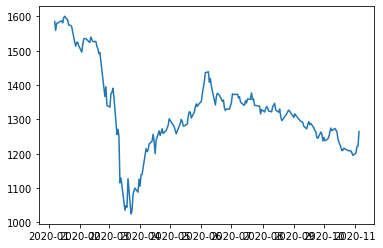

In [ ]:
plt.plot(df['Date'], df['SET_INDEX'])

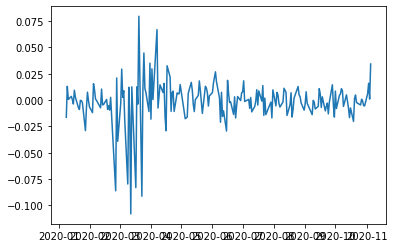

In [ ]:
plt.plot(df['Date'], df['daily_return'])

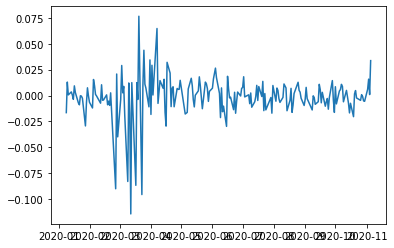

In [ ]:
plt.plot(df['Date'], df['log_return'])

Can you see the full picture of Thai SET Index now? Before you jump into any investments, it is good idea to conduct preliminary exploration of data first to get general overview of the asset you are interested in. However, this is still the first step. In order to conduct investments in stock market, we should drill down into sectors and companies that we believe have strong fundamentals. In addition, models should be constructed in order to see what factors could explain stock market returns. However, all of these are beyond the scope of probability theory.